In [4]:
import numpy as np
import pandas as pd

In [5]:
def answer_one():
    df = pd.read_csv('fraud_data.csv')
    bincount = np.bincount(df.Class)
    return bincount[1] / bincount[0]

In [6]:
answer_one()

0.016684632328818484

In [7]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Question 2
Using X_train, X_test, y_train, and y_test (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

This function should a return a tuple with two floats, i.e. (accuracy score, recall score).

In [8]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)

    return accuracy_score(y_test, y_dummy_predictions), recall_score(y_test, y_dummy_predictions)

In [9]:
answer_two()

(0.9852507374631269, 0.0)

# Question 3
Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

This function should a return a tuple with three floats, i.e. (accuracy score, recall score, precision score).

In [10]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    svm_predicted_mc = svm.predict(X_test)

    return accuracy_score(y_test, svm_predicted_mc), recall_score(y_test, svm_predicted_mc), precision_score(y_test, svm_predicted_mc)

In [11]:
answer_three()

(0.9907817109144543, 0.375, 1.0)

# Question 4
Using the SVC classifier with parameters {'C': 1e9, 'gamma': 1e-07}, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

This function should return a confusion matrix, a 2x2 numpy array with 4 integers.

In [12]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svm = SVC(gamma=1e-07,C=1e9).fit(X_train, y_train)
    svm_predicted_mc = svm.decision_function(X_test) > -220
    confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
    
    return confusion_mc

In [13]:
answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

# Question 5
Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is 0.75?

Looking at the roc curve, what is the true positive rate when the false positive rate is 0.16?

This function should return a tuple with two floats, i.e. (recall, true positive rate).

In [15]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc
       
    lr = LogisticRegression().fit(X_train, y_train)
    lr_predicted = lr.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, lr_predicted)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_predicted)
    
    %matplotlib notebook
    
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()
    
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()
    
    return 0.84, 0.82

<IPython.core.display.Javascript object>


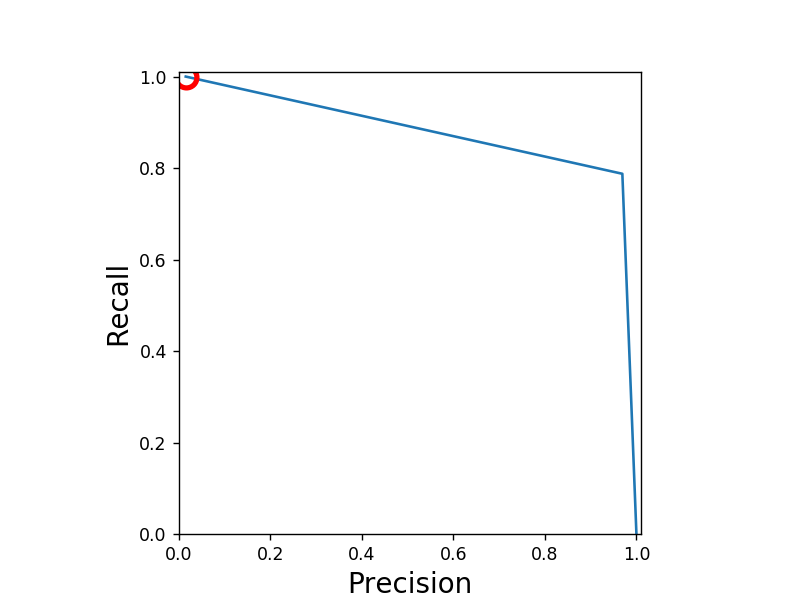

C:\Users\mehul\Anaconda3\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


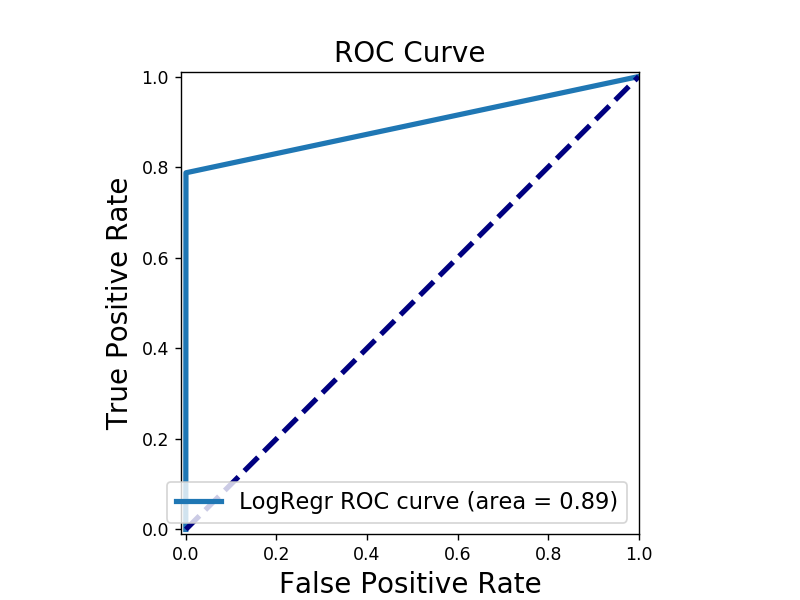

(0.84, 0.82)

In [17]:
import matplotlib.pyplot as plt
answer_five()

In [18]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression().fit(X_train, y_train)
    grid_values = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
    grid_clf_rec = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
    grid_clf_rec.fit(X_train, y_train)
    
    return np.array([grid_clf_rec.cv_results_['mean_test_score'][x:x+2] for x in range(0, len(grid_clf_rec.cv_results_['mean_test_score']), 2)])

In [19]:
answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

<IPython.core.display.Javascript object>


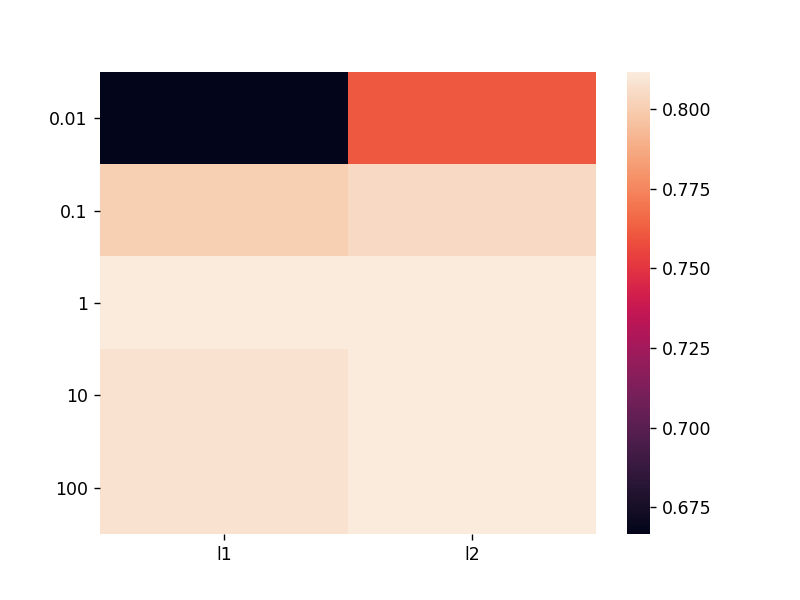

In [21]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt

#Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())